In [1]:
import pandas as pd
movies = pd.read_csv('data/movies_metadata.csv')
ratings = pd.read_csv('data/ratings.csv')

C:\Users\Pubudu.C\new\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [3]:
# remove unneccessary fields
ratings = ratings.drop('timestamp', 1)

ratings[ratings.isna().any(axis=1)]


,userId,movieId,rating


In [4]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
len(ratings)

26024289

In [6]:
len(ratings['userId'].unique())

270896

In [7]:
len(movies['id'].unique())

45435

In [8]:
# avg number of anime rated per user
import statistics
ratings_per_user = ratings.groupby('userId')['rating'].count()
statistics.mean(ratings_per_user.tolist())

96.06745393065974

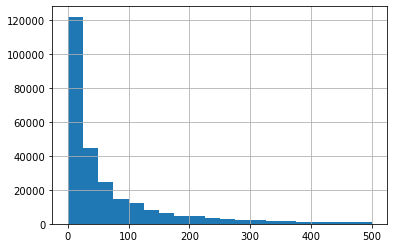

In [9]:
# distribution of ratings per user
# (we may want to exclude users without many data points)
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,500))

most users have rated fewer than 100 movies

In [10]:
# avg number of ratings given per anime
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
statistics.mean(ratings_per_movie.tolist())

576.8433780339134

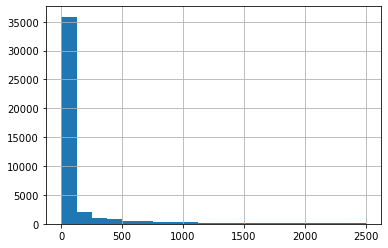

In [11]:
# distribution of ratings per movie
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_movie.hist(bins=20, range=(0,2500))

most movies received less than 500 ratings

In user-based collaborative filtering, vectors representing users are essentially lists of the ratings they’ve given. So the more movies in our dataset, the more dimensionality per user.

In [12]:
# counts of ratings per movie as a df
ratings_per_movie_df = pd.DataFrame(ratings_per_movie)

# remove if < 1000 ratings
filtered_ratings_per_movie_df = ratings_per_movie_df[ratings_per_movie_df.rating >= 1000]

# build a list of movie_ids to keep
popular_movies = filtered_ratings_per_movie_df.index.tolist()

In [13]:
filtered_ratings_per_movie_df.head()

,rating
movieId,
1,66008
2,26060
3,15497
4,2981
5,15258


In [15]:
# counts ratings per user as a df
ratings_per_user_df = pd.DataFrame(ratings_per_user)

# remove if < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

# build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [16]:
#filter out movie and users not in those lists.

filtered_ratings = ratings[ratings.movieId.isin(popular_movies)]
filtered_ratings = ratings[ratings.userId.isin(prolific_users)]
len(filtered_ratings)

8575119

In [17]:
filtered_ratings.head()

,userId,movieId,rating
1710,24,1,4.0
1711,24,2,3.0
1712,24,6,4.0
1713,24,16,3.0
1714,24,17,3.0


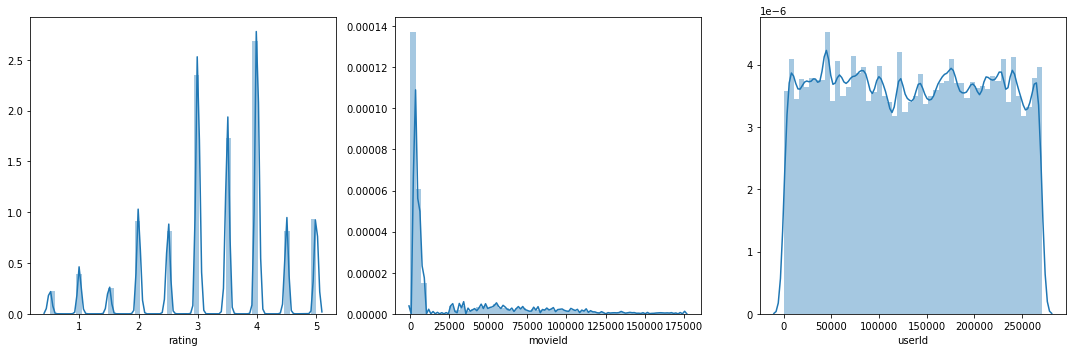

In [21]:
# Each column has a normal distribution (no left or right-skewed)
# Each column should have the same value range
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns# Visualize the plot
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(filtered_ratings.rating, ax=ax[0])
sns.distplot(filtered_ratings.movieId, ax=ax[1])
sns.distplot(filtered_ratings.userId, ax=ax[2])
plt.tight_layout()
plt.show()

In [22]:
# Import the library
from sklearn.preprocessing import power_transform# Extract the specific column and convert it as a numpy array
X = filtered_ratings[['rating', 'movieId', 'userId']].values# Transform the data
X_transformed = power_transform(X, method='yeo-johnson')

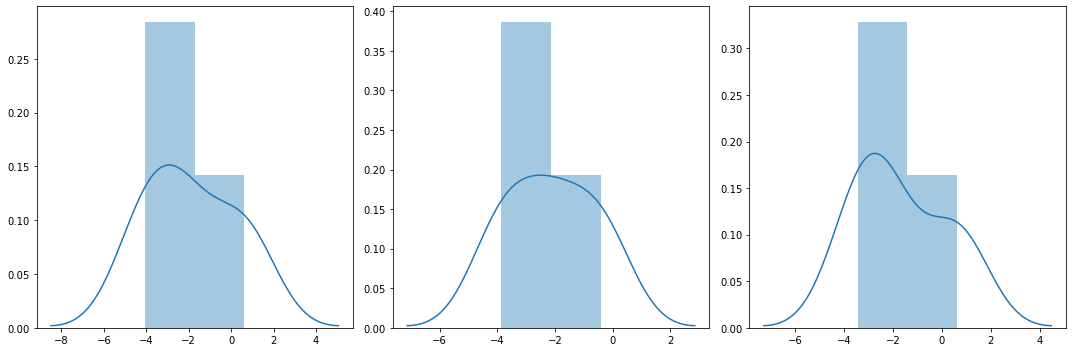

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(X_transformed[0], ax=ax[0])
sns.distplot(X_transformed[1], ax=ax[1])
sns.distplot(X_transformed[2], ax=ax[2])
plt.tight_layout()
plt.show()

In [24]:
# Import the library
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X_transformed = scaler.fit_transform(X_transformed)

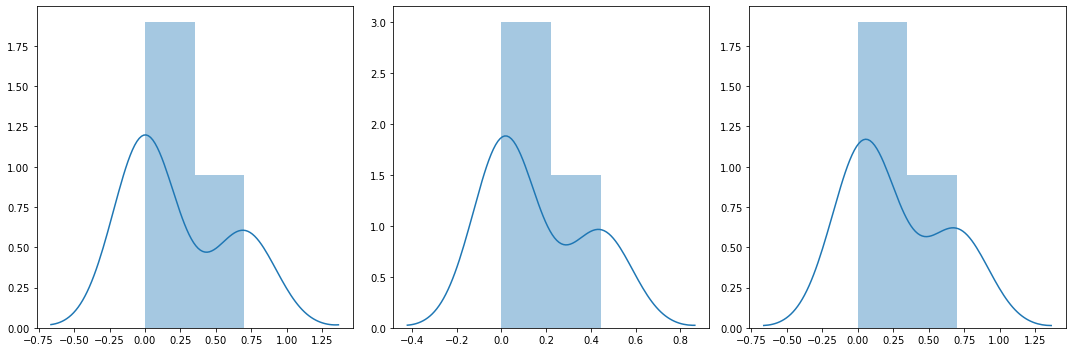

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(X_transformed[0], ax=ax[0])
sns.distplot(X_transformed[1], ax=ax[1])
sns.distplot(X_transformed[2], ax=ax[2])
plt.tight_layout()
plt.show()

In [26]:
# Import the library
import numpy as np
from sklearn.cluster import KMeans# To make sure our work becomes reproducible
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
    print('tttttttttt')
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model

tttttttttt
tttttttttt
tttttttttt
tttttttttt
tttttttttt
tttttttttt


KeyboardInterrupt: 

In [ ]:
sns.pointplot(x=list(range(2, 20)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

In [ ]:
from kneed import KneeLocator

kl = KneeLocator( range(2, 10), inertia, curve="convex", direction="decreasing")
kl.elbow
# inertia

In [ ]:
# To make sure our work becomes reproducible
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=4)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
filtered_ratings['cluster'] = cluster
filtered_ratings

In [ ]:
len(filtered_ratings['cluster'].unique())

In [ ]:
len(filtered_ratings['userId'].unique())

In [ ]:
len(filtered_ratings['movieId'].unique())

In [ ]:
for i in range(4):
    print("Cluster:", i)
    print('num of users:')
    users = list(filtered_ratings[filtered_ratings['cluster'] == i]['userId'].values)
    print(len(np.unique(users)))
    print('num of movies:')
    movies = list(filtered_ratings[filtered_ratings['cluster'] == i]['movieId'].values)
    print(len(np.unique(movies)))
    print()

In [ ]:
# Let's build a rating matrix between users and movies.

rating_matrix = filtered_ratings.pivot_table(index='userId', columns='movieId', values='rating')
# replace NaN values with 0
rating_matrix = rating_matrix.fillna(0)
# display the top few rows
rating_matrix.head()

In [ ]:
filtered_ratings.to_csv('preprocess/filtered_ratings.csv')

K-Means Elbow Method for Optimal K

When you plot Sum of Squared Error as a function of the number of clusters, notice that SSE continues to decrease as we increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(filtered_ratings)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions of K-Means

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from kneed import KneeLocator

kl = KneeLocator( range(1, 10), distortions, curve="convex", direction="decreasing")
kl.elbow

elbow is in 2

silhouette coefficient: How close the data point is to other points in the cluster, How far away the data point is from points in other clusters